## Data Source

- Living Standards Measurement Study: Fifth Integrated Household Survey 2019-2020 Malawi      


- https://microdata.worldbank.org/index.php/catalog/3818/get-microdata


## Step 1

- Download LSMS data for 2019-2020 Malawi

## Importing Libraries

In [1]:
import os
import pandas as pd
import missingno as msn

### Define BASE_DIR 

In [2]:
BASE_DIR = 'C:/Users/Ymersha/Documents/ECA\Data_for_change'
BASE_DIR

'C:/Users/Ymersha/Documents/ECA\\Data_for_change'

## Define the LSMS data path

In [3]:
lsms_dir = os.path.join(BASE_DIR, 'MWI_2019')
lsms_dir

'C:/Users/Ymersha/Documents/ECA\\Data_for_change\\MWI_2019'

## Define file names  

In [4]:
# Define household Identification filename
HI_file = 'hh_mod_a_filt.csv'

# Define consumption aggregate filename
ca_file = 'ihs5_consumption_aggregate.csv'

# Define Social Safety Nets filename
SSN_file = 'HH_mod_R.csv'

# Define food consumption filename
FC_file = 'HH_mod_G2.csv'

# Define Health Module filename
H_file = 'HH_MOD_D.csv'

# Define the household geovariables filename 
G_file = 'householdgeovariables_ihs5.csv'

## Define column names

In [5]:
# Define household Identification column

Unique_Household_Identifier_col = 'case_id'
Unique_Household_Identifier_col = 'HHID'
Rural_RLesidence_col = 'reside'
Region_Location = 'district'
District_Location_col = 'region'

# Define consumption aggregat column

food_consumption_annual = 'rexp_cat011'
Health_drugs_consumption_annual = 'rexp_cat061'
Tobacco_consumption_annual = 'rexp_cat022'
Health_annual_consumption  = 'rexp_cat06'
Total_annual_consumption_per_household  = 'rexpagg'
poor_households_below_national_poverty_line = 'poor'
ultra_poor_households_below_national_food_poverty_line = 'upoor'

# Define Social Safety Nets column

received_SSN = 'hh_r01'

# Define Food Consumption column

Cereals_Grains =  'hh_g08a'
Roots_Tubers = 'hh_g08b'  
Nuts_Pulses = 'hh_g08c'
Vegetables = 'hh_g08d'
Meat_Fish = 'hh_g08e'  
Fruits = 'hh_g08f'
Milk_Products = 'hh_g08g'
Fats_Oil = 'hh_g08h' 
Sugar_Product =  'hh_g08i'
Condiments = 'hh_g08j'

# Define Health column

Illness = 'hh_d05a'

# Define latitude and longitude columns
lat_col = 'ea_lat_mod'
lon_col = 'ea_lon_mod'

## Check if there are Missing Files

In [7]:
for file in [HI_file, ca_file, SSN_file, FC_file, H_file, G_file ]:
    assert os.path.isfile(os.path.join(lsms_dir, file)), print(f'Could not find {file}')

## Read the Data

### Read the household Identification data into a DataFrame

In [8]:
df_HI = pd.read_csv(os.path.join(lsms_dir, HI_file))
df_HI

,case_id,HHID,ea_id,region,district,reside,interviewDate,hh_wgt,hh_a02a,hh_a03,...,hh_a11,hh_a13,hh_a22,hh_a23,hh_g09,hh_m00,hh_o0a,hh_s01,hh_w01,hhsize
0,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,10101100,North,Chitipa,RURAL,2019-08-29,93.719400,10101,100,...,NO,NaN,14,58,NO,Yes,YES,YES,NO,4
1,101011000023,7144cc6d29b3485d9e6d6188b255c756,10101100,North,Chitipa,RURAL,2019-08-29,93.719400,10101,100,...,NO,NaN,14,64,YES,Yes,YES,YES,NO,4
2,101011000040,9936d103bf974a93afbc63d477b8b3f2,10101100,North,Chitipa,RURAL,2019-08-28,93.719400,10101,100,...,NO,NaN,14,30,NO,Yes,NO,NO,NO,4
3,101011000071,cc8f211413cd493e83e01a96aba95bbb,10101100,North,Chitipa,RURAL,2019-08-29,93.719400,10101,100,...,NO,NaN,14,30,NO,Yes,YES,YES,NO,5
4,101011000095,e50cfa8d11b44d56891e0fad015b07c7,10101100,North,Chitipa,RURAL,2019-08-28,93.719400,10101,100,...,NO,NaN,14,58,NO,Yes,NO,YES,NO,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11429,315538160177,217455196b2e46a0996ca61da955e243,31553816,Southern,Blantyre City,URBAN,2020-01-27,607.988356,31553,816,...,YES,Dwelling found but no household member could b...,17,68,YES,Yes,NO,NO,NO,3
11430,315538160189,23707c4144fb489ab5482403274f396f,31553816,Southern,Blantyre City,URBAN,2020-01-24,607.988356,31553,816,...,NO,NaN,17,37,NO,No,NO,YES,NO,3
11431,315538160190,01d649e11c664fe580315f47328f99f8,31553816,Southern,Blantyre City,URBAN,2020-01-25,607.988356,31553,816,...,NO,NaN,17,69,YES,Yes,YES,NO,NO,1
11432,315538160235,80b809e8c90b49e88996ae340a532820,31553816,Southern,Blantyre City,URBAN,2020-01-25,607.988356,31553,816,...,NO,NaN,17,37,NO,No,NO,NO,NO,3


In [9]:
## Select only:

# Unique_Household_Identifier_col = 'case_id'
# Rural_RLesidence_col = 'reside'
# Region_Location = 'district'
# District_Location_col = 'region'

df_HI_sel = df_HI[['case_id', 'reside', 'district', 'region']]
df_HI_sel

,case_id,reside,district,region
0,101011000014,RURAL,Chitipa,North
1,101011000023,RURAL,Chitipa,North
2,101011000040,RURAL,Chitipa,North
3,101011000071,RURAL,Chitipa,North
4,101011000095,RURAL,Chitipa,North
...,...,...,...,...
11429,315538160177,URBAN,Blantyre City,Southern
11430,315538160189,URBAN,Blantyre City,Southern
11431,315538160190,URBAN,Blantyre City,Southern
11432,315538160235,URBAN,Blantyre City,Southern


### Read the consumption aggregat data into a DataFrame

In [10]:
df_CA = pd.read_csv(os.path.join(lsms_dir, ca_file))
df_CA

,case_id,HHID,region,district,ea_id,TA,area,urban,sdate,smonth,...,expaggpc,rexpaggpc,upline,pline,poor,upoor,gap_poor,gap_ultra,gap2_poor,gap2_ultra
0,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,1,101,10101100,10101,2,2,29,8,...,102056.007812,99918.367188,101293.426251,165878.859375,1,1,39.764256,1.357501,15.811960,0.018428
1,101011000023,7144cc6d29b3485d9e6d6188b255c756,1,101,10101100,10101,2,2,29,8,...,172945.156250,169322.718750,101293.426251,165878.859375,0,0,0.000000,0.000000,0.000000,0.000000
2,101011000040,9936d103bf974a93afbc63d477b8b3f2,1,101,10101100,10101,2,2,28,8,...,95647.656250,93644.257812,101293.426251,165878.859375,1,1,43.546600,7.551496,18.963062,0.570251
3,101011000071,cc8f211413cd493e83e01a96aba95bbb,1,101,10101100,10101,2,2,29,8,...,462444.437500,452758.093750,101293.426251,165878.859375,0,0,0.000000,0.000000,0.000000,0.000000
4,101011000095,e50cfa8d11b44d56891e0fad015b07c7,1,101,10101100,10101,2,2,28,8,...,187255.640625,183333.437500,101293.426251,165878.859375,0,0,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11429,315538160177,217455196b2e46a0996ca61da955e243,3,315,31553816,31553,1,1,27,1,...,418060.906250,367966.250000,101293.426251,165878.859375,0,0,0.000000,0.000000,0.000000,0.000000
11430,315538160189,23707c4144fb489ab5482403274f396f,3,315,31553816,31553,1,1,24,1,...,452054.093750,397886.156250,101293.426251,165878.859375,0,0,0.000000,0.000000,0.000000,0.000000
11431,315538160190,01d649e11c664fe580315f47328f99f8,3,315,31553816,31553,1,1,25,1,...,854353.750000,751979.875000,101293.426251,165878.859375,0,0,0.000000,0.000000,0.000000,0.000000
11432,315538160235,80b809e8c90b49e88996ae340a532820,3,315,31553816,31553,1,1,25,1,...,535716.375000,471523.593750,101293.426251,165878.859375,0,0,0.000000,0.000000,0.000000,0.000000


In [11]:
# Select only:
# food_consumption_annual = 'rexp_cat011'
# Health_drugs_consumption_annual = 'rexp_cat061'
# Tobacco_consumption_annual = 'rexp_cat022'
# Health_annual_consumption  = 'rexp_cat06'
# Total_annual_consumption_per_household  = 'rexpagg'
# poor_households_below_national_poverty_line = 'poor'
# ultra_poor_households_below_national_food_poverty_line = 'upoor'

df_CA_sel = df_CA[['case_id', 'rexp_cat011', 'rexp_cat061', 'rexp_cat022', 'rexp_cat06', 'rexpagg', 'poor', 'upoor']]
df_CA_sel

,case_id,rexp_cat011,rexp_cat061,rexp_cat022,rexp_cat06,rexpagg,poor,upoor
0,101011000014,2.007816e+05,1272.770630,0.0,1272.770630,3.996735e+05,1,1
1,101011000023,3.662017e+05,2545.541260,0.0,5482.704102,6.772909e+05,0,0
2,101011000040,2.403571e+05,0.000000,0.0,0.000000,3.745770e+05,1,1
3,101011000071,1.675397e+06,0.000000,0.0,0.000000,2.263790e+06,0,0
4,101011000095,6.753428e+05,0.000000,0.0,0.000000,9.166672e+05,0,0
...,...,...,...,...,...,...,...,...
11429,315538160177,8.134040e+05,0.000000,0.0,0.000000,1.103899e+06,0,0
11430,315538160189,6.480432e+05,0.000000,0.0,0.000000,1.193658e+06,0,0
11431,315538160190,2.714465e+05,1601.916382,0.0,1601.916382,7.519799e+05,0,0
11432,315538160235,9.647856e+05,0.000000,0.0,0.000000,1.414571e+06,0,0


### Read the Social Safety Nets data into a DataFrame

In [20]:
df_SSN = pd.read_csv(os.path.join(lsms_dir, SSN_file))
df_SSN

,case_id,HHID,hh_r0a,hh_r01,hh_r01_101,hh_r01_102,hh_r01_111,hh_r01_112,hh_r01_specify,hh_r02a,...,hh_r04a,hh_r04b,hh_r04c,hh_r04d,hh_r04e,hh_r05a,hh_r05b,hh_r06,hh_r07a,hh_r07b
0,205013260060,0004806a172546e99ae07674de291ed7,Free Maize (Specify),NO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,205013260060,0004806a172546e99ae07674de291ed7,Free Food (other than Maize) (Specify),NO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,205013260060,0004806a172546e99ae07674de291ed7,Inputs-For-Work Programme,NO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,205013260060,0004806a172546e99ae07674de291ed7,School Feeding Programme,YES,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,NaN,NaN,NaN,NaN,NaN,NaN,9.0,July,2019.0
4,205013260060,0004806a172546e99ae07674de291ed7,Free Distribution of Likuni Phala,NO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148644,304045650040,fffe13ed0c28474c975af476cc1a33b7,Direct Cash Transfers from others,NO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148645,304045650040,fffe13ed0c28474c975af476cc1a33b7,"Other, Specify",NO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148646,304045650040,fffe13ed0c28474c975af476cc1a33b7,MASAF - Public Works Programme,NO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
148647,304045650040,fffe13ed0c28474c975af476cc1a33b7,Food/Cash-for-Work Programme,NO,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
# Select only:
# received_SSN = 'hh_r01'

df_SSN_sel = df_SSN[['case_id', 'hh_r01']]
df_SSN_sel

,case_id,hh_r01
0,205013260060,NO
1,205013260060,NO
2,205013260060,NO
3,205013260060,YES
4,205013260060,NO
...,...,...
148644,304045650040,NO
148645,304045650040,NO
148646,304045650040,NO
148647,304045650040,NO


### Read the food consumption data into a DataFrame

In [12]:
df_FC = pd.read_csv(os.path.join(lsms_dir, FC_file))
df_FC

,case_id,HHID,hh_g08a,hh_g08b,hh_g08c,hh_g08d,hh_g08e,hh_g08f,hh_g08g,hh_g08h,hh_g08i,hh_g08j
0,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,7,2.0,0,7,1,3,0,5.0,3.0,7.0
1,101011000023,7144cc6d29b3485d9e6d6188b255c756,7,0.0,7,7,1,0,0,7.0,2.0,7.0
2,101011000040,9936d103bf974a93afbc63d477b8b3f2,7,1.0,2,7,2,0,0,4.0,0.0,7.0
3,101011000071,cc8f211413cd493e83e01a96aba95bbb,7,3.0,2,7,5,1,1,7.0,1.0,7.0
4,101011000095,e50cfa8d11b44d56891e0fad015b07c7,7,2.0,1,7,1,0,0,7.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...
11428,315538160177,217455196b2e46a0996ca61da955e243,7,7.0,4,7,3,3,0,5.0,4.0,7.0
11429,315538160189,23707c4144fb489ab5482403274f396f,7,4.0,2,7,6,6,7,7.0,7.0,7.0
11430,315538160190,01d649e11c664fe580315f47328f99f8,7,0.0,0,3,6,1,0,7.0,7.0,7.0
11431,315538160235,80b809e8c90b49e88996ae340a532820,7,7.0,3,7,6,1,7,7.0,7.0,7.0


In [13]:
# Select only:

# Cereals_Grains =  'hh_g08a'
# Roots_Tubers = 'hh_g08b'  
# Nuts_Pulses = 'hh_g08c'
# Vegetables = 'hh_g08d'
# Meat_Fish = 'hh_g08e'  
# Fruits = 'hh_g08f'
# Milk_Products = 'hh_g08g'
# Fats_Oil = 'hh_g08h' 
# Sugar_Product =  'hh_g08i'
# Condiments = 'hh_g08j'

df_FC_sel = df_FC[['case_id', 'hh_g08a', 'hh_g08b', 'hh_g08c', 'hh_g08d', 'hh_g08e', 'hh_g08f', 'hh_g08g', \
                     'hh_g08h', 'hh_g08i', 'hh_g08j' ]]
df_FC_sel

,case_id,hh_g08a,hh_g08b,hh_g08c,hh_g08d,hh_g08e,hh_g08f,hh_g08g,hh_g08h,hh_g08i,hh_g08j
0,101011000014,7,2.0,0,7,1,3,0,5.0,3.0,7.0
1,101011000023,7,0.0,7,7,1,0,0,7.0,2.0,7.0
2,101011000040,7,1.0,2,7,2,0,0,4.0,0.0,7.0
3,101011000071,7,3.0,2,7,5,1,1,7.0,1.0,7.0
4,101011000095,7,2.0,1,7,1,0,0,7.0,0.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...
11428,315538160177,7,7.0,4,7,3,3,0,5.0,4.0,7.0
11429,315538160189,7,4.0,2,7,6,6,7,7.0,7.0,7.0
11430,315538160190,7,0.0,0,3,6,1,0,7.0,7.0,7.0
11431,315538160235,7,7.0,3,7,6,1,7,7.0,7.0,7.0


### Read the Health Module data into a DataFrame

In [14]:
df_H = pd.read_csv(os.path.join(lsms_dir, H_file))
df_H

C:\Users\Ymersha\AppData\Local\Temp\ipykernel_10860\3315045451.py:1: DtypeWarning: Columns (10,14,16,41,49,55,57) have mixed types. Specify dtype option on import or set low_memory=False.
  df_H = pd.read_csv(os.path.join(lsms_dir, H_file))


,case_id,HHID,PID,hh_d02,hh_d03,hh_d04,hh_d05a,hh_d05b,hh_d05_oth,hh_d06a,...,hh_d36b,hh_d36b_oth,hh_d38,hh_d38_oth,hh_d45,hh_d45_oth,hh_d46,hh_d46_oth,hh_d47,hh_d48
0,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,1,ANOTHER HH MEMBER,2.0,YES,"FEVER, MALARIA",NaN,NaN,SELF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN
1,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,2,SELF REPORTED,NaN,NO,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,YES,0.0
2,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,3,ANOTHER HH MEMBER,2.0,YES,"FEVER, MALARIA",NaN,NaN,SELF,...,NaN,NaN,SOLID FOOD ONLY,NaN,NaN,NaN,NaN,NaN,NO,NaN
3,101011000014,7d78f2c5da59436d9bde9b09ea8a8aaf,4,ANOTHER HH MEMBER,2.0,NO,NaN,NaN,NaN,NaN,...,NaN,NaN,TEA/DRINK WITH SOLID FOOD,NaN,HOSPITAL/ MATERNITY CLINIC,NaN,NURSE/MIDWIFE,NaN,NaN,NaN
4,101011000023,7144cc6d29b3485d9e6d6188b255c756,1,SELF REPORTED,NaN,NO,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50471,315538160190,01d649e11c664fe580315f47328f99f8,1,SELF REPORTED,NaN,NO,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN
50472,315538160235,80b809e8c90b49e88996ae340a532820,1,ANOTHER HH MEMBER,2.0,NO,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN
50473,315538160235,80b809e8c90b49e88996ae340a532820,2,SELF REPORTED,NaN,NO,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,NaN
50474,315538160235,80b809e8c90b49e88996ae340a532820,3,ANOTHER HH MEMBER,2.0,NO,NaN,NaN,NaN,NaN,...,NaN,NaN,TEA/DRINK WITH SOLID FOOD,NaN,NaN,NaN,NaN,NaN,NO,NaN


In [15]:
# Select only:
# Illness = 'hh_d05a'

df_H_sel = df_H[['case_id',  'hh_d05a']]
df_H_sel

,case_id,hh_d05a
0,101011000014,"FEVER, MALARIA"
1,101011000014,NaN
2,101011000014,"FEVER, MALARIA"
3,101011000014,NaN
4,101011000023,NaN
...,...,...
50471,315538160190,NaN
50472,315538160235,NaN
50473,315538160235,NaN
50474,315538160235,NaN


### Read the household geovariables data into a DataFrame

In [16]:
df_G = pd.read_csv(os.path.join(lsms_dir, G_file))
df_G

,case_id,ea_id,dist_road,dist_agmrkt,dist_auction,dist_admarc,dist_border,dist_popcenter,dist_boma,ssa_aez09,...,wetQ_avgstart,wetQ_avg,h2018_ndvi_avg,h2018_ndvi_max,h2019_ndvi_avg,h2019_ndvi_max,ndvi_avg,ndvi_max,ea_lat_mod,ea_lon_mod
0,101011000014,10101100,3.6,4.1,213.199997,12.8,3.400000,4.1,4.054738,323.0,...,17.0,743.0,0.188,0.438,0.135,0.238,0.241,0.44,-9.70057,33.239170
1,101011000023,10101100,3.6,4.1,213.199997,12.8,3.400000,4.1,4.054738,323.0,...,17.0,743.0,0.188,0.438,0.135,0.238,0.241,0.44,-9.70057,33.239170
2,101011000040,10101100,3.6,4.1,213.199997,12.8,3.400000,4.1,4.054738,323.0,...,17.0,743.0,0.188,0.438,0.135,0.238,0.241,0.44,-9.70057,33.239170
3,101011000071,10101100,3.6,4.1,213.199997,12.8,3.400000,4.1,4.054738,323.0,...,17.0,743.0,0.188,0.438,0.135,0.238,0.241,0.44,-9.70057,33.239170
4,101011000095,10101100,3.6,4.1,213.199997,12.8,3.400000,4.1,4.054738,323.0,...,17.0,743.0,0.188,0.438,0.135,0.238,0.241,0.44,-9.70057,33.239170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11429,315538160177,31553816,2.6,6.6,3.900000,4.2,49.400002,6.6,6.643630,323.0,...,16.0,628.0,0.168,0.398,0.129,0.460,0.178,0.38,-15.83674,35.036121
11430,315538160189,31553816,2.6,6.6,3.900000,4.2,49.400002,6.6,6.643630,323.0,...,16.0,628.0,0.168,0.398,0.129,0.460,0.178,0.38,-15.83674,35.036121
11431,315538160190,31553816,2.6,6.6,3.900000,4.2,49.400002,6.6,6.643630,323.0,...,16.0,628.0,0.168,0.398,0.129,0.460,0.178,0.38,-15.83674,35.036121
11432,315538160235,31553816,2.6,6.6,3.900000,4.2,49.400002,6.6,6.643630,323.0,...,16.0,628.0,0.168,0.398,0.129,0.460,0.178,0.38,-15.83674,35.036121


In [17]:
# Select only:

# lat_col = 'ea_lat_mod'
# lon_col = 'ea_lon_mod'

df_G_sel = df_G[['case_id', 'ea_lat_mod', 'ea_lon_mod']]
df_G_sel

,case_id,ea_lat_mod,ea_lon_mod
0,101011000014,-9.70057,33.239170
1,101011000023,-9.70057,33.239170
2,101011000040,-9.70057,33.239170
3,101011000071,-9.70057,33.239170
4,101011000095,-9.70057,33.239170
...,...,...,...
11429,315538160177,-15.83674,35.036121
11430,315538160189,-15.83674,35.036121
11431,315538160190,-15.83674,35.036121
11432,315538160235,-15.83674,35.036121


## Merge DataFrames

In [18]:
df_HI_CA = pd.merge(df_HI_sel, df_CA_sel, on='case_id')
df_HI_CA

,case_id,reside,district,region,rexp_cat011,rexp_cat061,rexp_cat022,rexp_cat06,rexpagg,poor,upoor
0,101011000014,RURAL,Chitipa,North,2.007816e+05,1272.770630,0.0,1272.770630,3.996735e+05,1,1
1,101011000023,RURAL,Chitipa,North,3.662017e+05,2545.541260,0.0,5482.704102,6.772909e+05,0,0
2,101011000040,RURAL,Chitipa,North,2.403571e+05,0.000000,0.0,0.000000,3.745770e+05,1,1
3,101011000071,RURAL,Chitipa,North,1.675397e+06,0.000000,0.0,0.000000,2.263790e+06,0,0
4,101011000095,RURAL,Chitipa,North,6.753428e+05,0.000000,0.0,0.000000,9.166672e+05,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11429,315538160177,URBAN,Blantyre City,Southern,8.134040e+05,0.000000,0.0,0.000000,1.103899e+06,0,0
11430,315538160189,URBAN,Blantyre City,Southern,6.480432e+05,0.000000,0.0,0.000000,1.193658e+06,0,0
11431,315538160190,URBAN,Blantyre City,Southern,2.714465e+05,1601.916382,0.0,1601.916382,7.519799e+05,0,0
11432,315538160235,URBAN,Blantyre City,Southern,9.647856e+05,0.000000,0.0,0.000000,1.414571e+06,0,0


In [22]:
df_HI_CA_SSN = pd.merge(df_HI_CA, df_SSN_sel , on='case_id')
df_HI_CA_SSN

,case_id,reside,district,region,rexp_cat011,rexp_cat061,rexp_cat022,rexp_cat06,rexpagg,poor,upoor,hh_r01
0,101011000014,RURAL,Chitipa,North,200781.593750,1272.77063,0.0,1272.77063,399673.46875,1,1,NO
1,101011000014,RURAL,Chitipa,North,200781.593750,1272.77063,0.0,1272.77063,399673.46875,1,1,NO
2,101011000014,RURAL,Chitipa,North,200781.593750,1272.77063,0.0,1272.77063,399673.46875,1,1,NO
3,101011000014,RURAL,Chitipa,North,200781.593750,1272.77063,0.0,1272.77063,399673.46875,1,1,NO
4,101011000014,RURAL,Chitipa,North,200781.593750,1272.77063,0.0,1272.77063,399673.46875,1,1,NO
...,...,...,...,...,...,...,...,...,...,...,...,...
148644,315538160239,URBAN,Blantyre City,Southern,167358.671875,0.00000,0.0,0.00000,421723.68750,0,0,NO
148645,315538160239,URBAN,Blantyre City,Southern,167358.671875,0.00000,0.0,0.00000,421723.68750,0,0,NO
148646,315538160239,URBAN,Blantyre City,Southern,167358.671875,0.00000,0.0,0.00000,421723.68750,0,0,NO
148647,315538160239,URBAN,Blantyre City,Southern,167358.671875,0.00000,0.0,0.00000,421723.68750,0,0,NO


In [23]:
df_HI_CA_SSN_FC = pd.merge(df_HI_CA_SSN, df_FC_sel , on='case_id')
df_HI_CA_SSN_FC

,case_id,reside,district,region,rexp_cat011,rexp_cat061,rexp_cat022,rexp_cat06,rexpagg,poor,...,hh_g08a,hh_g08b,hh_g08c,hh_g08d,hh_g08e,hh_g08f,hh_g08g,hh_g08h,hh_g08i,hh_g08j
0,101011000014,RURAL,Chitipa,North,200781.593750,1272.77063,0.0,1272.77063,399673.46875,1,...,7,2.0,0,7,1,3,0,5.0,3.0,7.0
1,101011000014,RURAL,Chitipa,North,200781.593750,1272.77063,0.0,1272.77063,399673.46875,1,...,7,2.0,0,7,1,3,0,5.0,3.0,7.0
2,101011000014,RURAL,Chitipa,North,200781.593750,1272.77063,0.0,1272.77063,399673.46875,1,...,7,2.0,0,7,1,3,0,5.0,3.0,7.0
3,101011000014,RURAL,Chitipa,North,200781.593750,1272.77063,0.0,1272.77063,399673.46875,1,...,7,2.0,0,7,1,3,0,5.0,3.0,7.0
4,101011000014,RURAL,Chitipa,North,200781.593750,1272.77063,0.0,1272.77063,399673.46875,1,...,7,2.0,0,7,1,3,0,5.0,3.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148631,315538160239,URBAN,Blantyre City,Southern,167358.671875,0.00000,0.0,0.00000,421723.68750,0,...,7,0.0,0,6,3,6,1,0.0,2.0,7.0
148632,315538160239,URBAN,Blantyre City,Southern,167358.671875,0.00000,0.0,0.00000,421723.68750,0,...,7,0.0,0,6,3,6,1,0.0,2.0,7.0
148633,315538160239,URBAN,Blantyre City,Southern,167358.671875,0.00000,0.0,0.00000,421723.68750,0,...,7,0.0,0,6,3,6,1,0.0,2.0,7.0
148634,315538160239,URBAN,Blantyre City,Southern,167358.671875,0.00000,0.0,0.00000,421723.68750,0,...,7,0.0,0,6,3,6,1,0.0,2.0,7.0


In [24]:
df_HI_CA_SSN_FC_H = pd.merge(df_HI_CA_SSN_FC, df_H_sel , on='case_id')
df_HI_CA_SSN_FC_H

,case_id,reside,district,region,rexp_cat011,rexp_cat061,rexp_cat022,rexp_cat06,rexpagg,poor,...,hh_g08b,hh_g08c,hh_g08d,hh_g08e,hh_g08f,hh_g08g,hh_g08h,hh_g08i,hh_g08j,hh_d05a
0,101011000014,RURAL,Chitipa,North,200781.593750,1272.77063,0.0,1272.77063,399673.46875,1,...,2.0,0,7,1,3,0,5.0,3.0,7.0,"FEVER, MALARIA"
1,101011000014,RURAL,Chitipa,North,200781.593750,1272.77063,0.0,1272.77063,399673.46875,1,...,2.0,0,7,1,3,0,5.0,3.0,7.0,NaN
2,101011000014,RURAL,Chitipa,North,200781.593750,1272.77063,0.0,1272.77063,399673.46875,1,...,2.0,0,7,1,3,0,5.0,3.0,7.0,"FEVER, MALARIA"
3,101011000014,RURAL,Chitipa,North,200781.593750,1272.77063,0.0,1272.77063,399673.46875,1,...,2.0,0,7,1,3,0,5.0,3.0,7.0,NaN
4,101011000014,RURAL,Chitipa,North,200781.593750,1272.77063,0.0,1272.77063,399673.46875,1,...,2.0,0,7,1,3,0,5.0,3.0,7.0,"FEVER, MALARIA"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656176,315538160239,URBAN,Blantyre City,Southern,167358.671875,0.00000,0.0,0.00000,421723.68750,0,...,0.0,0,6,3,6,1,0.0,2.0,7.0,NaN
656177,315538160239,URBAN,Blantyre City,Southern,167358.671875,0.00000,0.0,0.00000,421723.68750,0,...,0.0,0,6,3,6,1,0.0,2.0,7.0,NaN
656178,315538160239,URBAN,Blantyre City,Southern,167358.671875,0.00000,0.0,0.00000,421723.68750,0,...,0.0,0,6,3,6,1,0.0,2.0,7.0,NaN
656179,315538160239,URBAN,Blantyre City,Southern,167358.671875,0.00000,0.0,0.00000,421723.68750,0,...,0.0,0,6,3,6,1,0.0,2.0,7.0,NaN


In [25]:
df_HI_CA_SSN_FC_H_G = pd.merge(df_HI_CA_SSN_FC_H, df_G_sel , on='case_id')
df_HI_CA_SSN_FC_H_G

,case_id,reside,district,region,rexp_cat011,rexp_cat061,rexp_cat022,rexp_cat06,rexpagg,poor,...,hh_g08d,hh_g08e,hh_g08f,hh_g08g,hh_g08h,hh_g08i,hh_g08j,hh_d05a,ea_lat_mod,ea_lon_mod
0,101011000014,RURAL,Chitipa,North,200781.593750,1272.77063,0.0,1272.77063,399673.46875,1,...,7,1,3,0,5.0,3.0,7.0,"FEVER, MALARIA",-9.70057,33.239170
1,101011000014,RURAL,Chitipa,North,200781.593750,1272.77063,0.0,1272.77063,399673.46875,1,...,7,1,3,0,5.0,3.0,7.0,NaN,-9.70057,33.239170
2,101011000014,RURAL,Chitipa,North,200781.593750,1272.77063,0.0,1272.77063,399673.46875,1,...,7,1,3,0,5.0,3.0,7.0,"FEVER, MALARIA",-9.70057,33.239170
3,101011000014,RURAL,Chitipa,North,200781.593750,1272.77063,0.0,1272.77063,399673.46875,1,...,7,1,3,0,5.0,3.0,7.0,NaN,-9.70057,33.239170
4,101011000014,RURAL,Chitipa,North,200781.593750,1272.77063,0.0,1272.77063,399673.46875,1,...,7,1,3,0,5.0,3.0,7.0,"FEVER, MALARIA",-9.70057,33.239170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656176,315538160239,URBAN,Blantyre City,Southern,167358.671875,0.00000,0.0,0.00000,421723.68750,0,...,6,3,6,1,0.0,2.0,7.0,NaN,-15.83674,35.036121
656177,315538160239,URBAN,Blantyre City,Southern,167358.671875,0.00000,0.0,0.00000,421723.68750,0,...,6,3,6,1,0.0,2.0,7.0,NaN,-15.83674,35.036121
656178,315538160239,URBAN,Blantyre City,Southern,167358.671875,0.00000,0.0,0.00000,421723.68750,0,...,6,3,6,1,0.0,2.0,7.0,NaN,-15.83674,35.036121
656179,315538160239,URBAN,Blantyre City,Southern,167358.671875,0.00000,0.0,0.00000,421723.68750,0,...,6,3,6,1,0.0,2.0,7.0,NaN,-15.83674,35.036121


In [26]:
df_merged = df_HI_CA_SSN_FC_H_G
df_merged

,case_id,reside,district,region,rexp_cat011,rexp_cat061,rexp_cat022,rexp_cat06,rexpagg,poor,...,hh_g08d,hh_g08e,hh_g08f,hh_g08g,hh_g08h,hh_g08i,hh_g08j,hh_d05a,ea_lat_mod,ea_lon_mod
0,101011000014,RURAL,Chitipa,North,200781.593750,1272.77063,0.0,1272.77063,399673.46875,1,...,7,1,3,0,5.0,3.0,7.0,"FEVER, MALARIA",-9.70057,33.239170
1,101011000014,RURAL,Chitipa,North,200781.593750,1272.77063,0.0,1272.77063,399673.46875,1,...,7,1,3,0,5.0,3.0,7.0,NaN,-9.70057,33.239170
2,101011000014,RURAL,Chitipa,North,200781.593750,1272.77063,0.0,1272.77063,399673.46875,1,...,7,1,3,0,5.0,3.0,7.0,"FEVER, MALARIA",-9.70057,33.239170
3,101011000014,RURAL,Chitipa,North,200781.593750,1272.77063,0.0,1272.77063,399673.46875,1,...,7,1,3,0,5.0,3.0,7.0,NaN,-9.70057,33.239170
4,101011000014,RURAL,Chitipa,North,200781.593750,1272.77063,0.0,1272.77063,399673.46875,1,...,7,1,3,0,5.0,3.0,7.0,"FEVER, MALARIA",-9.70057,33.239170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656176,315538160239,URBAN,Blantyre City,Southern,167358.671875,0.00000,0.0,0.00000,421723.68750,0,...,6,3,6,1,0.0,2.0,7.0,NaN,-15.83674,35.036121
656177,315538160239,URBAN,Blantyre City,Southern,167358.671875,0.00000,0.0,0.00000,421723.68750,0,...,6,3,6,1,0.0,2.0,7.0,NaN,-15.83674,35.036121
656178,315538160239,URBAN,Blantyre City,Southern,167358.671875,0.00000,0.0,0.00000,421723.68750,0,...,6,3,6,1,0.0,2.0,7.0,NaN,-15.83674,35.036121
656179,315538160239,URBAN,Blantyre City,Southern,167358.671875,0.00000,0.0,0.00000,421723.68750,0,...,6,3,6,1,0.0,2.0,7.0,NaN,-15.83674,35.036121


### Drop the case_id  columns

In [27]:
df_merged.drop(['case_id'], axis=1, inplace=True)
df_merged

,reside,district,region,rexp_cat011,rexp_cat061,rexp_cat022,rexp_cat06,rexpagg,poor,upoor,...,hh_g08d,hh_g08e,hh_g08f,hh_g08g,hh_g08h,hh_g08i,hh_g08j,hh_d05a,ea_lat_mod,ea_lon_mod
0,RURAL,Chitipa,North,200781.593750,1272.77063,0.0,1272.77063,399673.46875,1,1,...,7,1,3,0,5.0,3.0,7.0,"FEVER, MALARIA",-9.70057,33.239170
1,RURAL,Chitipa,North,200781.593750,1272.77063,0.0,1272.77063,399673.46875,1,1,...,7,1,3,0,5.0,3.0,7.0,NaN,-9.70057,33.239170
2,RURAL,Chitipa,North,200781.593750,1272.77063,0.0,1272.77063,399673.46875,1,1,...,7,1,3,0,5.0,3.0,7.0,"FEVER, MALARIA",-9.70057,33.239170
3,RURAL,Chitipa,North,200781.593750,1272.77063,0.0,1272.77063,399673.46875,1,1,...,7,1,3,0,5.0,3.0,7.0,NaN,-9.70057,33.239170
4,RURAL,Chitipa,North,200781.593750,1272.77063,0.0,1272.77063,399673.46875,1,1,...,7,1,3,0,5.0,3.0,7.0,"FEVER, MALARIA",-9.70057,33.239170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656176,URBAN,Blantyre City,Southern,167358.671875,0.00000,0.0,0.00000,421723.68750,0,0,...,6,3,6,1,0.0,2.0,7.0,NaN,-15.83674,35.036121
656177,URBAN,Blantyre City,Southern,167358.671875,0.00000,0.0,0.00000,421723.68750,0,0,...,6,3,6,1,0.0,2.0,7.0,NaN,-15.83674,35.036121
656178,URBAN,Blantyre City,Southern,167358.671875,0.00000,0.0,0.00000,421723.68750,0,0,...,6,3,6,1,0.0,2.0,7.0,NaN,-15.83674,35.036121
656179,URBAN,Blantyre City,Southern,167358.671875,0.00000,0.0,0.00000,421723.68750,0,0,...,6,3,6,1,0.0,2.0,7.0,NaN,-15.83674,35.036121


In [28]:
df_merged.columns

Index(['reside', 'district', 'region', 'rexp_cat011', 'rexp_cat061',
       'rexp_cat022', 'rexp_cat06', 'rexpagg', 'poor', 'upoor', 'hh_r01',
       'hh_g08a', 'hh_g08b', 'hh_g08c', 'hh_g08d', 'hh_g08e', 'hh_g08f',
       'hh_g08g', 'hh_g08h', 'hh_g08i', 'hh_g08j', 'hh_d05a', 'ea_lat_mod',
       'ea_lon_mod'],
      dtype='object')

## Missing data

### Check for missing data

In [29]:
missing_data = df_merged.isnull()

# Check if any missing data exists in the DataFrame
if missing_data.any().any():
    print("There is missing data in the DataFrame.")
else:
    print("There is no missing data in the DataFrame.")

There is missing data in the DataFrame.


### Columns with missing data 

In [30]:
columns_with_missing_data = df_merged.isnull().any().sum()
print(f"Number of columns with missing data: {columns_with_missing_data}")


Number of columns with missing data: 7


In [31]:
# Check for missing data (Check NaN Values)
missing_data = df_merged.isnull()
# or
# missing_data = df_merged.isna()

# Sum the missing values in each column
missing_count = missing_data.sum()

# Print the number of missing values in each column
print("Missing values in each column:")
print(missing_count)

Missing values in each column:
reside              0
district            0
region              0
rexp_cat011         0
rexp_cat061         0
rexp_cat022         0
rexp_cat06          0
rexpagg             0
poor                0
upoor               0
hh_r01              0
hh_g08a             0
hh_g08b            39
hh_g08c             0
hh_g08d             0
hh_g08e             0
hh_g08f             0
hh_g08g             0
hh_g08h            26
hh_g08i            65
hh_g08j            78
hh_d05a        483894
ea_lat_mod        442
ea_lon_mod        442
dtype: int64


### Check Percent Missing

In [32]:
percent_missing = df_merged.isnull().sum() * 100 / len(df_merged)
percent_missing.round(3)

reside          0.000
district        0.000
region          0.000
rexp_cat011     0.000
rexp_cat061     0.000
rexp_cat022     0.000
rexp_cat06      0.000
rexpagg         0.000
poor            0.000
upoor           0.000
hh_r01          0.000
hh_g08a         0.000
hh_g08b         0.006
hh_g08c         0.000
hh_g08d         0.000
hh_g08e         0.000
hh_g08f         0.000
hh_g08g         0.000
hh_g08h         0.004
hh_g08i         0.010
hh_g08j         0.012
hh_d05a        73.744
ea_lat_mod      0.067
ea_lon_mod      0.067
dtype: float64

<Axes: >

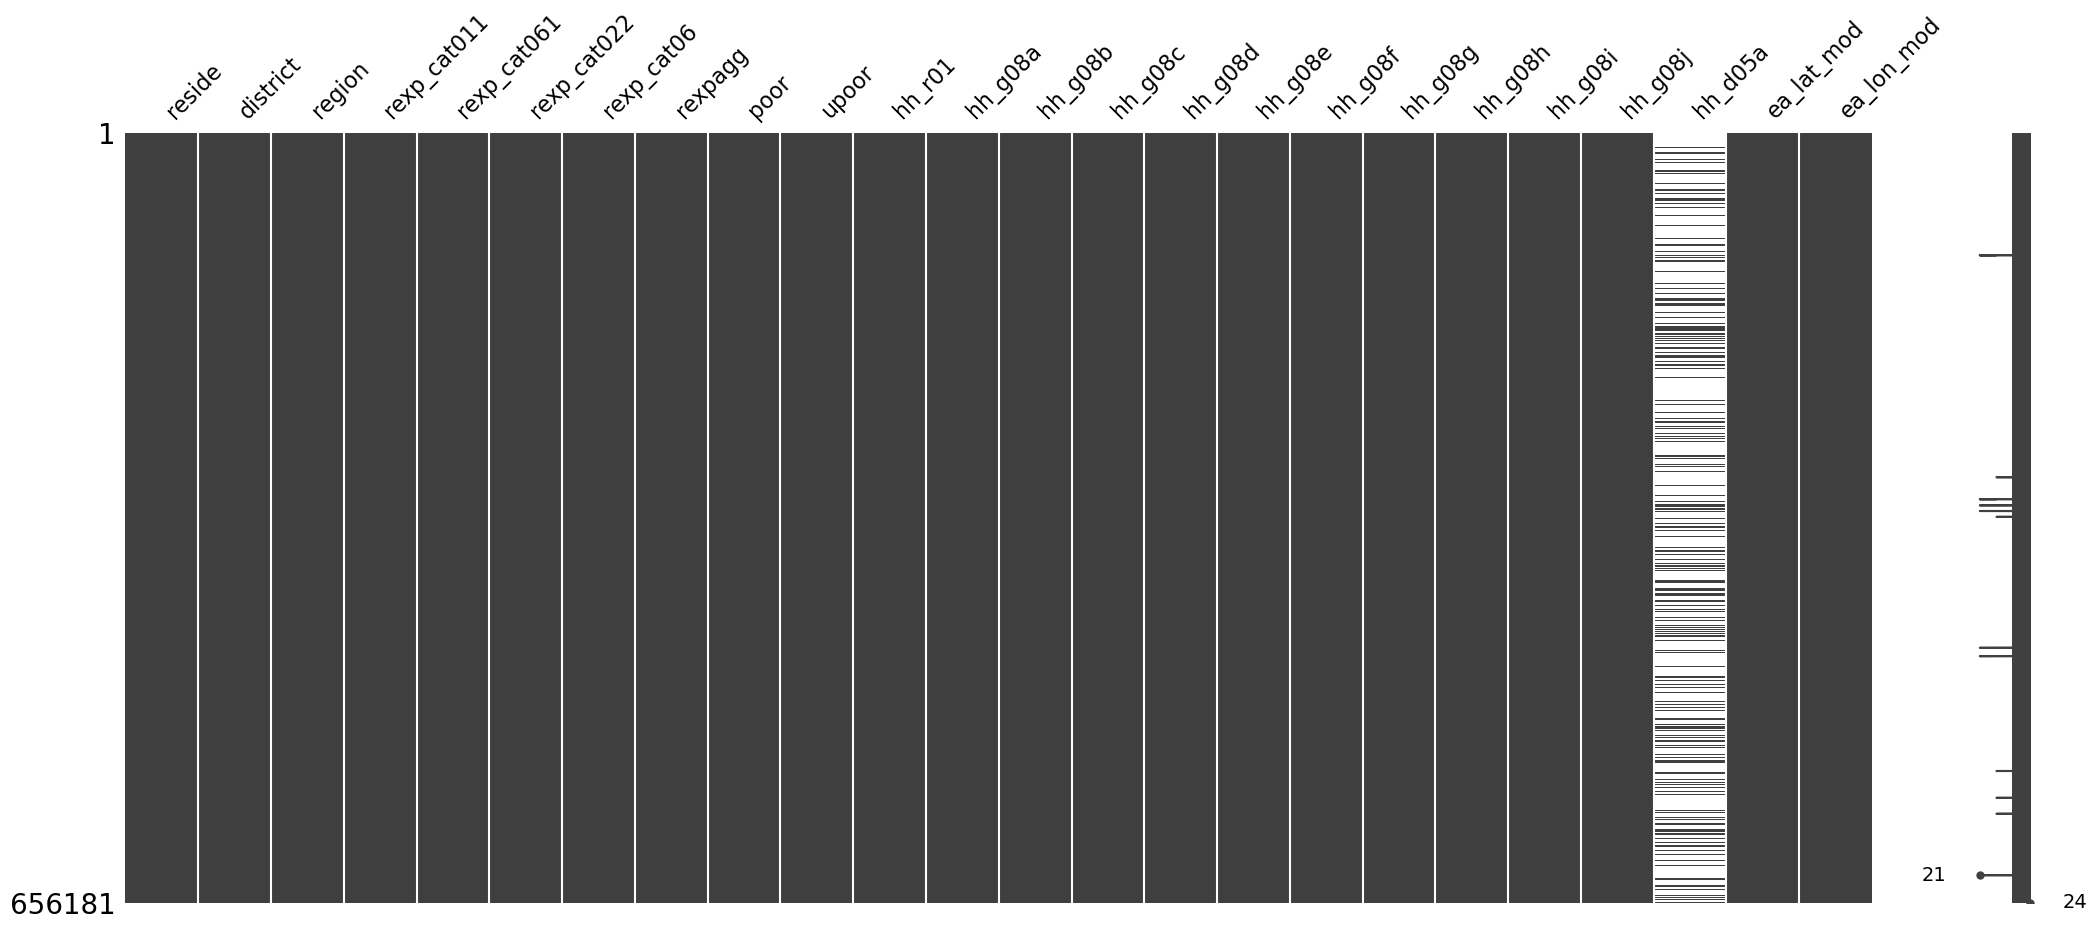

In [33]:
msn.matrix(df_merged)

In [34]:
df_merged.to_csv(os.path.join(BASE_DIR,  'merged_dataset.csv'), index=False)